In [1]:
import numpy as np
import pandas as pd
import os, glob, csv
from tqdm import tqdm
import matplotlib.pyplot as plt
from detecta import detect_peaks
from scipy.signal import welch
from scipy.fftpack import fft
from matplotlib import rcParams
import data_function

# 기본 폰트를 Arial로 설정
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

basedir, chi_dir = os.path.split(os.getcwd())
EMG_DIR = os.path.join(basedir, 'PROCESSING', 'EMG')
ACC_DIR = os.path.join(basedir, 'PROCESSING', 'ACC')
EMG_FILE = sorted(glob.glob(f"{EMG_DIR}/*.csv"))
ACC_FILE = sorted(glob.glob(f"{ACC_DIR}/*.csv"))

emg_sr = 1000
acc_sr = 100

muscles = ['RF','VL','BF','GM']

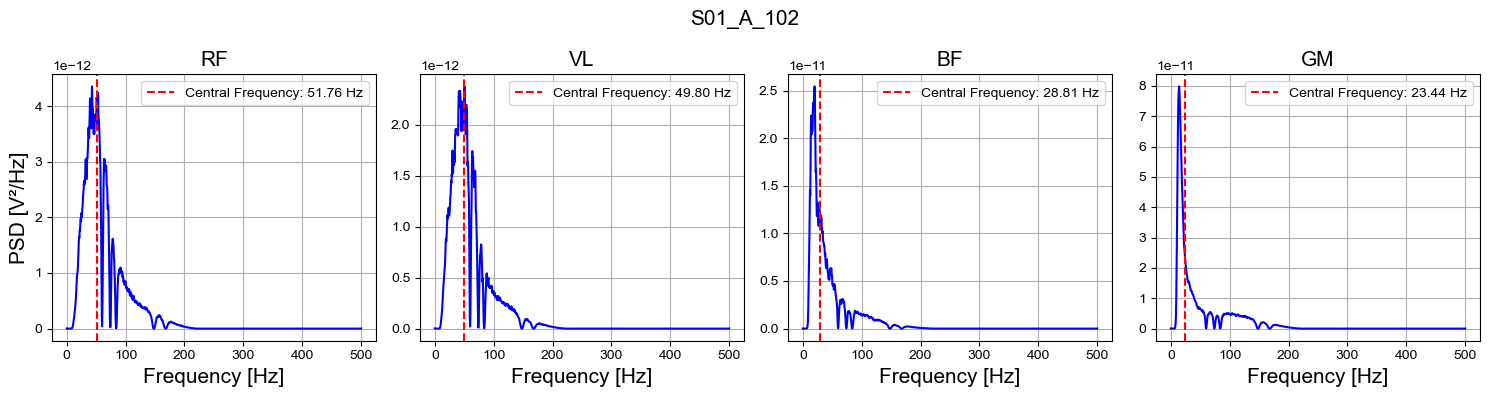

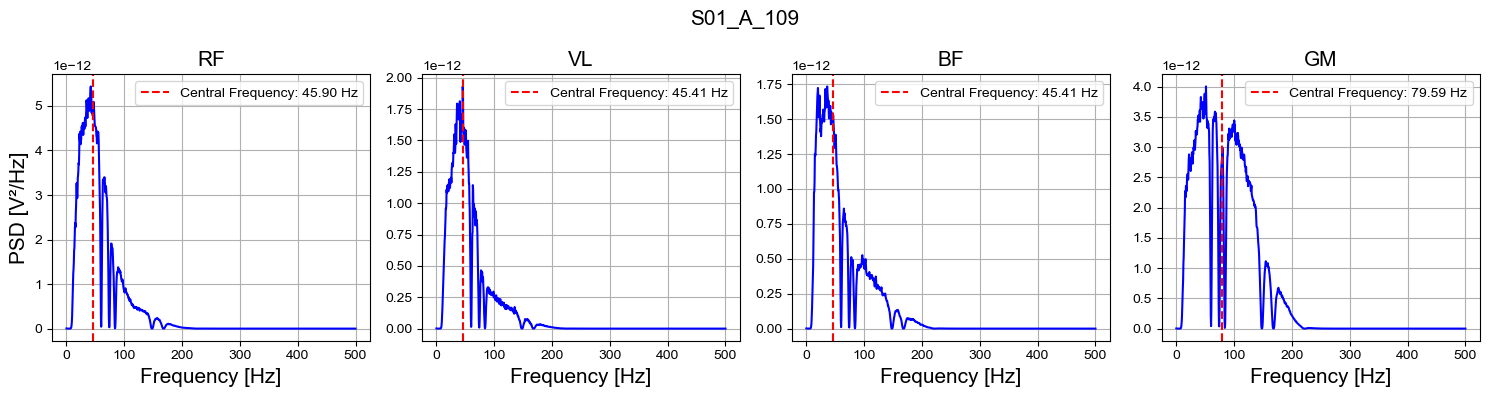

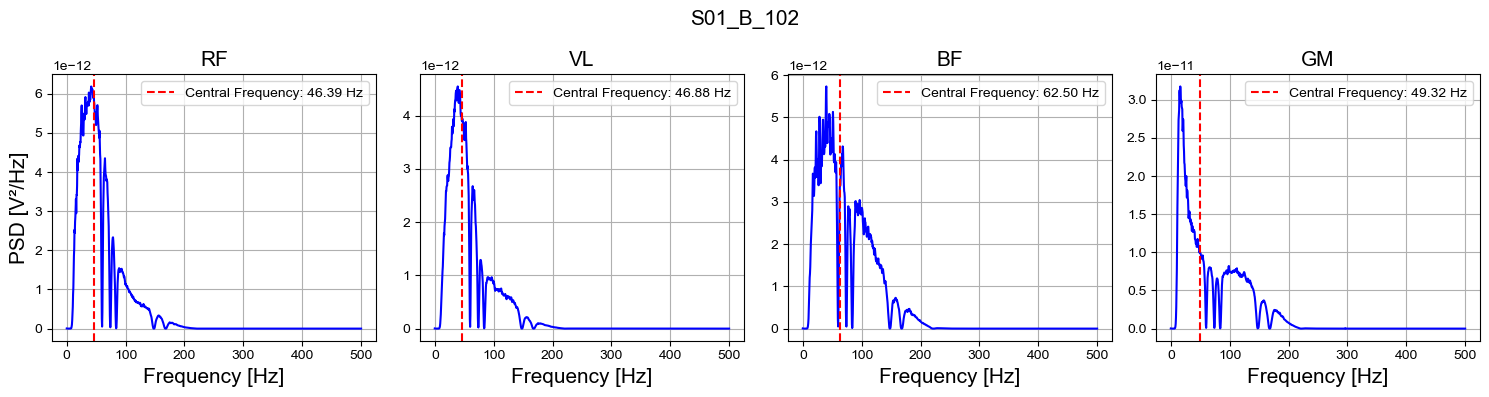

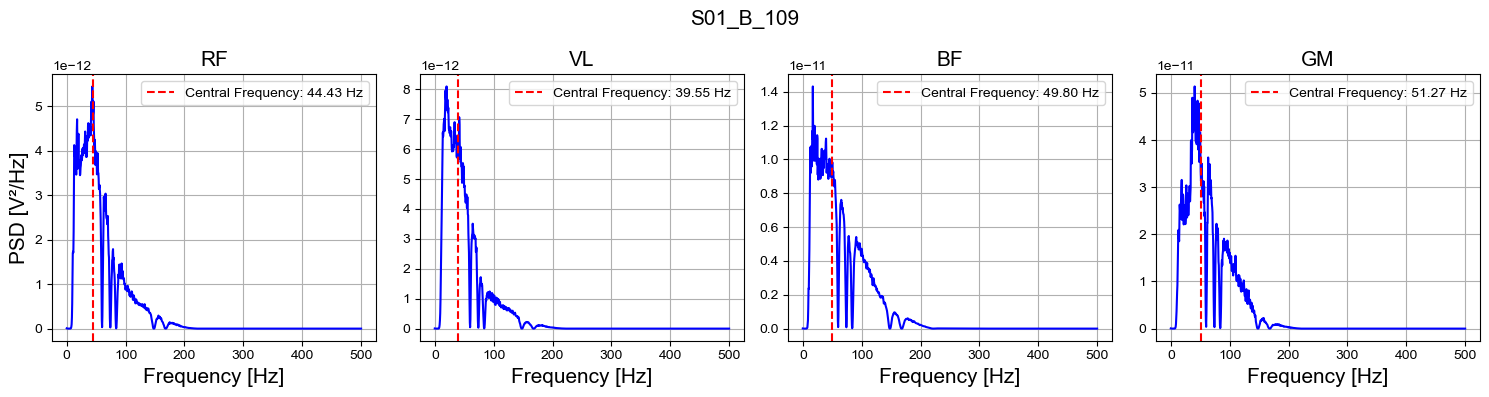

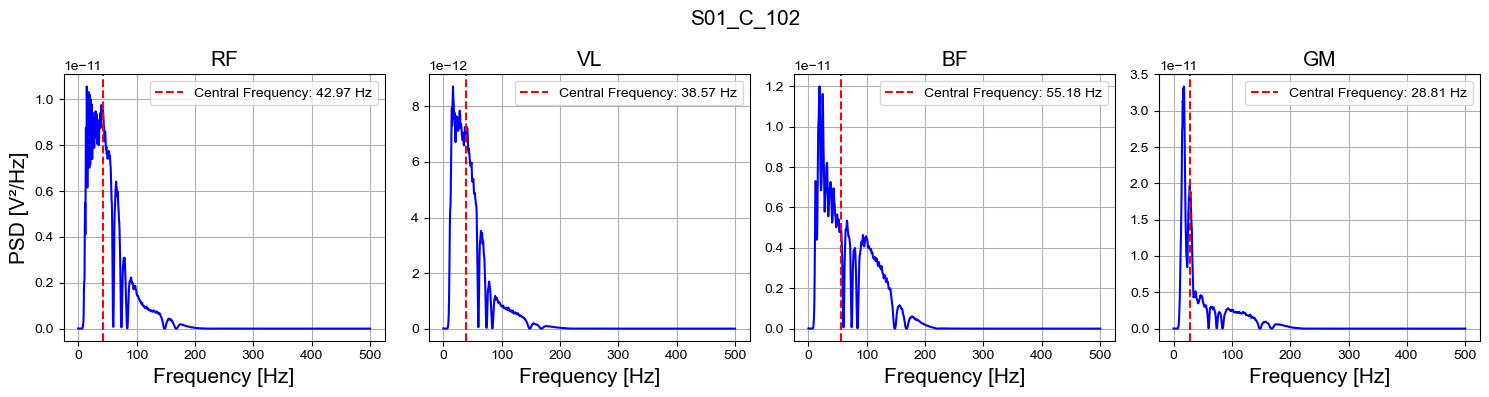

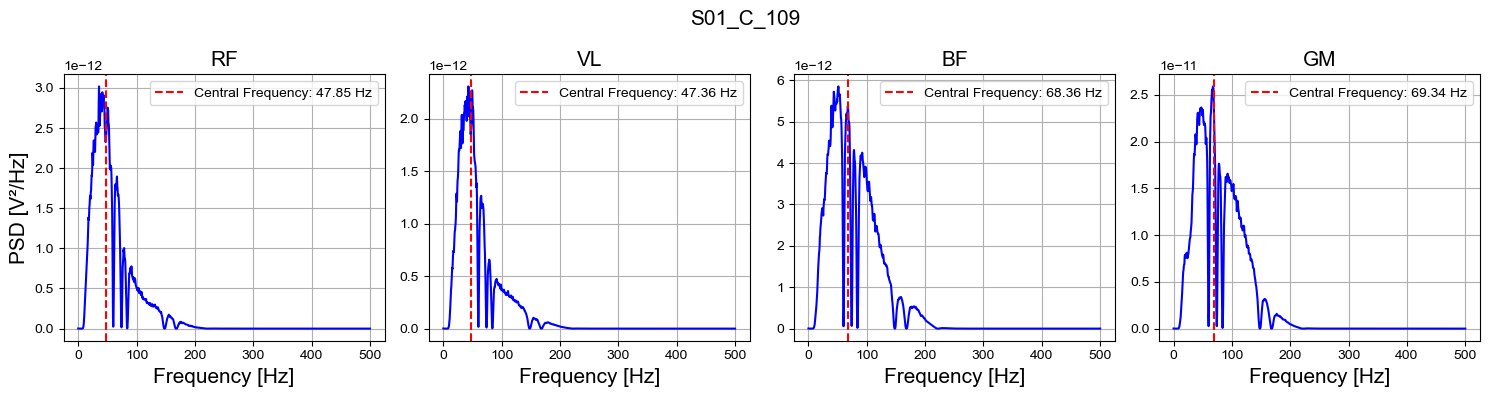

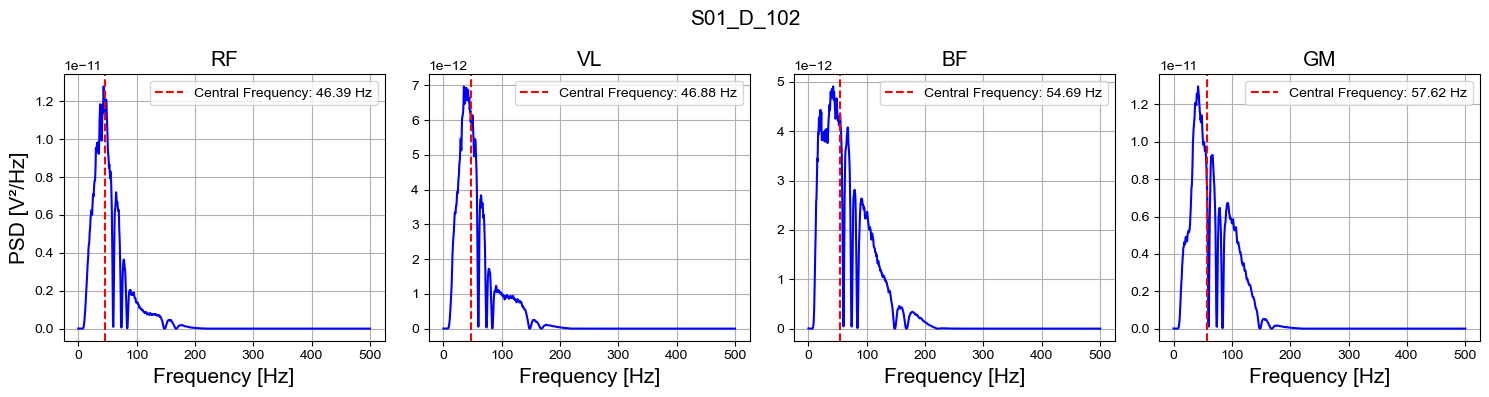

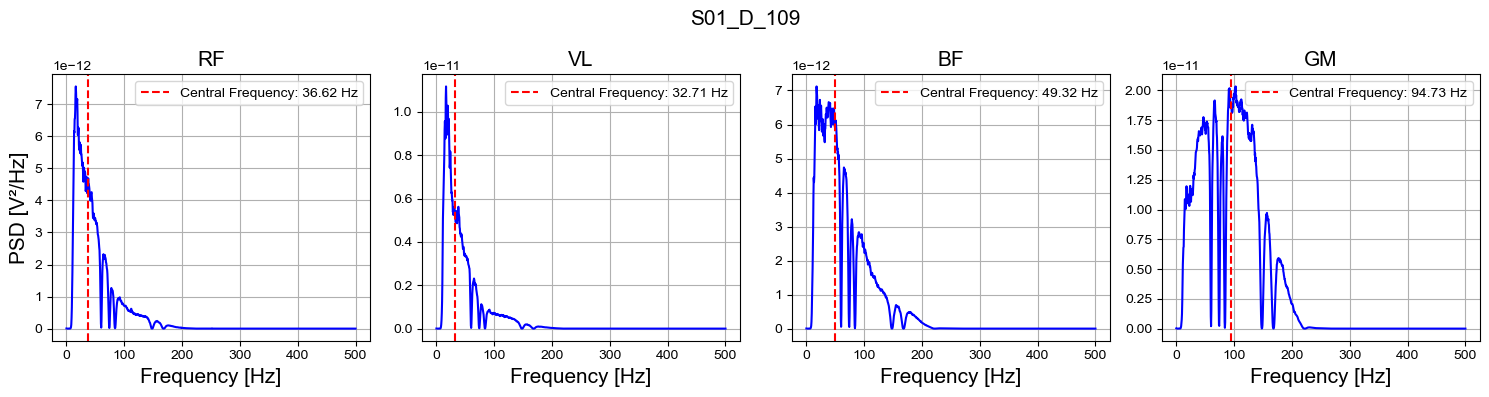

In [7]:
file = EMG_FILE[0]

for emg_file, acc_file in zip(EMG_FILE, ACC_FILE):
    df = pd.read_csv(emg_file)
    acc = pd.read_csv(acc_file)
    trial = os.path.basename(emg_file).replace('.csv','')
    for m in muscles:
        df[m] = data_function.filtering.bandpassfilter(df[m],emg_sr,10,200,4)
        df[m] = data_function.filtering.notchfilter(df[m],emg_sr,222)
        df[m] = data_function.filtering.notchfilter(df[m],emg_sr,168)
        df[m] = data_function.filtering.notchfilter(df[m],emg_sr,148)
        df[m] = data_function.filtering.notchfilter(df[m],emg_sr,84)
        df[m] = data_function.filtering.notchfilter(df[m],emg_sr,74)
        df[m] = data_function.filtering.notchfilter(df[m],emg_sr,60)
    
    WELCH = data_function.welch_fft(df, emg_sr, 2048)
    data_function.power_welch_plot(WELCH, trial)


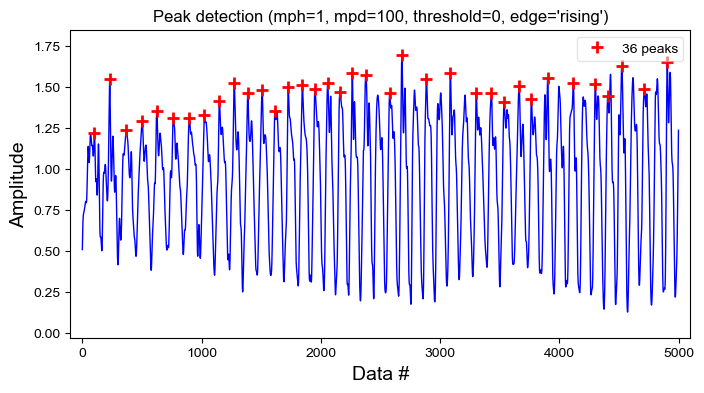

array([ 101,  229,  369,  502,  624,  763,  898, 1024, 1149, 1274, 1387,
       1507, 1615, 1726, 1845, 1951, 2057, 2161, 2263, 2378, 2577, 2680,
       2886, 3086, 3304, 3431, 3537, 3663, 3766, 3902, 4118, 4302, 4406,
       4524, 4714, 4905])

In [15]:
sr = 100
dt = 1
acc_filt = data_function.filtering.lowpassfilter(acc['R [g]'][:5000], 100, 6, 4)
detect_peaks(acc_filt, mph = 1, mpd = sr * dt, show=True)

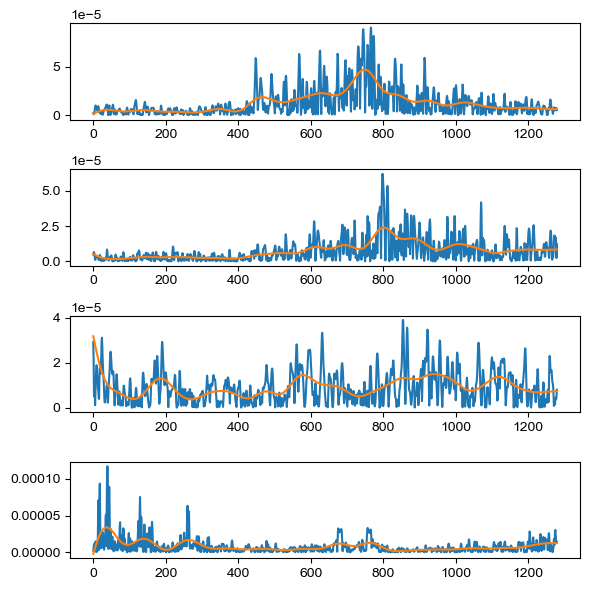

In [10]:
fig, ax = plt.subplots(4,1, figsize=(6,6))
for idx, m in enumerate(muscles):
    ax[idx].plot(abs(df[m][1010:2290].reset_index(drop=True)))
    ax[idx].plot(data_function.filtering.lowpassfilter(abs(df[m][1010:2290]),1000, 10, 4))

plt.tight_layout()